First  three steps


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from grid import *


In [3]:
grid_size = (10, 10)
grid = np.zeros(grid_size)  # 0 = empty, 1 = wall, 2 = room, 3 = door, 4 = window

In [4]:
print(grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
def gen_room(grid, start, size):
    """
    1 = room, 2 = walls
    """
    x, y = start
    w, h = size

    if x + w > grid.shape[0] or y + h > grid.shape[1]:
        raise ValueError("Room does not fit in the grid.")

    grid[x:x+w, y:y+h] = 1

    grid[x-1:x+w+1, y-1] = 2  # Top wall
    grid[x-1:x+w+1, y+h] = 2  # Bottom wall
    grid[x-1, y:y+h] = 2  # Left wall
    grid[x+w, y:y+h] = 2  # Right wall
    print(grid)

    return grid

In [6]:
start = (1,1)
size = (3,3)
grid2 = gen_room(grid, start, size)

[[2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


UP(1, [[0, 1, 0], [0, 1, 0], [0, 0, 0]])


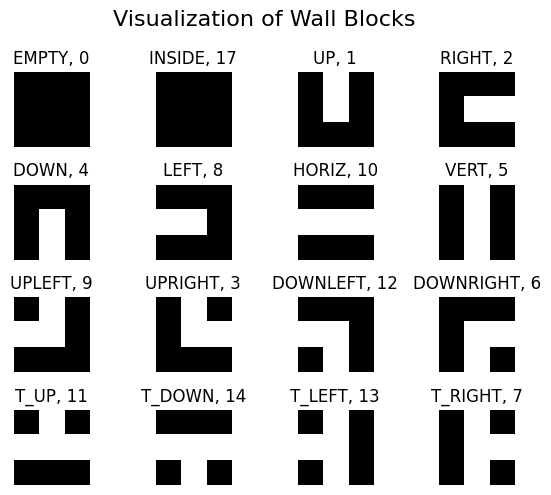

In [7]:
wall = Wall(1)
# Visualization
fig, axes = plt.subplots(4, 4, figsize=(6, 5))
print(wall)
for ax, wall in zip(axes.flat, Wall):
    ax.imshow(wall.ins, cmap = "gray")
    ax.set_title(f"{wall.name}, {wall.value}")
    ax.axis('off')


plt.suptitle('Visualization of Wall Blocks', fontsize=16)
plt.tight_layout()

plt.show()


In [8]:
def gen_rect(size, Wall=Wall, plot=True):
    """
    Function to generate a rectangle and placing accurate corner pieces as well
    """
    x, y = size
    rect = []
    top = [Wall(6)] + (x-2)*[Wall(10)] + [Wall(12)]
    mid = [Wall(5)] + [Wall(17)] * (x - 2) + [Wall(5)]
    bottom = [Wall(3)] + [Wall(10)] * (x - 2) + [Wall(9)]
    rect = np.array([top] + [mid] * (y - 2) + [bottom])
    if (plot): plot_rect(size, rect)
    return rect

def glue_rect(rect_a, rect_b, offset = 0, Wall=Wall, plot=True):
    """
    Any of the 8 sides, with offset left-side corner, also take care of connecting wall and corners
    """
    
    y_a, x_a = rect_a.shape
    y_b, x_b = rect_b.shape
    print(f"x_a={x_a}, y_a={y_a}")
    print(f"x_b={x_b}, y_b={y_b}")
    print(f"Offset: {offset}")
    
    combined_shape = (y_a + y_b - 1, max(x_a, offset + x_b))
    y_c, x_c = combined_shape
    combined_rect = np.full(combined_shape, Wall.EMPTY, dtype=object)

    combined_rect[:y_a, :x_a] = rect_a.copy()
    combined_rect[y_a-1 :y_a+y_b-1, offset:offset+x_b ] = rect_b.copy()
    # Fix corners and destroy connecting wall, 
    # Border is from y = y_a, x = offset to x = offset + x_b 
    for j in range(x_b):
        # Left-hand side corner
        if j == 0:
            combined_rect[y_a-1, offset] = Wall(12) if offset > 0 else Wall(5)

        # Destroy wall in between
        if 0 < j < x_a-1 - offset:
            combined_rect[y_a-1, offset + j] = Wall(17)

        # Right-hand side corner
        if j == x_a - 1 - offset:
            if offset + x_b < x_a:
                combined_rect[y_a-1, offset + j] = Wall(6)
            elif offset + x_b == x_a:
                combined_rect[y_a-1, offset + j] = Wall(5)
            else:
                combined_rect[y_a-1, offset + j] = Wall(3)
    if plot:
        plot_rect((x_c, y_c), combined_rect)
    return combined_rect

def plot_rect(size, rect):
    fig, axes = plt.subplots(size[1], size[0], figsize=size, gridspec_kw={'wspace': 0, 'hspace': 0})
    
    for ax, row in zip(axes.flatten(), rect.flatten()):
        ax.imshow(row.ins, aspect='auto')
        ax.axis('off')


    plt.tight_layout()
    plt.show()


In [ ]:


def int_to_wall(rect, Wall=Wall):
    """
    Converts a numpy array of integers to an array of Wall objects.
    Each integer is transformed to Wall(n) where n is the integer value.
    """
    return np.vectorize(lambda x: Wall(x))(rect)

def gen_rect_int(size):
    """
    Function to generate a rectangle and placing accurate corner pieces as well

    """
    x, y = size
    rect = []
    
    # Using integers for walls: 6, 10, 12, 5, 3, 9
    top = [6] + (x-2)*[10] + [12]
    mid = [5] + [17] * (x - 2) + [5]
    bottom = [3] + [10] * (x - 2) + [9]
    
    # Construct the rectangle
    rect = np.array([top] + [mid] * (y - 2) + [bottom])
    
    return rect

def glue_rect_int(rect_a, rect_b, offset=0, plot=True):
    """
    Glue two rectangles (rect_a and rect_b) together with a specified offset.
    Handles the corners and connecting walls, represented with integers.
    """
    y_a, x_a = rect_a.shape
    y_b, x_b = rect_b.shape
    print(f"x_a={x_a}, y_a={y_a}")
    print(f"x_b={x_b}, y_b={y_b}")
    print(f"Offset: {offset}")
    
    # Create combined shape (rows, columns)
    combined_shape = (y_a + y_b - 1, max(x_a, offset + x_b))
    y_c, x_c = combined_shape
    combined_rect = np.full(combined_shape, 0, dtype=int)  # Use 0 to represent empty spaces

    # Place rect_a into the combined grid
    combined_rect[:y_a, :x_a] = rect_a.copy()
    # Place rect_b with offset into the combined grid
    combined_rect[y_a-1 : y_a + y_b - 1, offset : offset + x_b] = rect_b.copy()

    # Fix corners and destroy connecting wall
    for j in range(x_b):
        # Left-hand side corner
        if j == 0:
            combined_rect[y_a-1, offset] = 12 if offset > 0 else 5

        # Destroy wall in between
        if 0 < j < x_a - 1 - offset:
            combined_rect[y_a-1, offset + j] = 17  # Empty inside space

        # Right-hand side corner
        if j == x_a - 1 - offset:
            if offset + x_b < x_a:
                combined_rect[y_a-1, offset+j] = 6
            elif offset + x_b == x_a:
                combined_rect[y_a-1, offset+j] = 5
            else:
                combined_rect[y_a-1, offset+j] = 3

    return combined_rect

def place_room_seeds(floor, total=0):
    """
    Function to create and place room seeds
    So it goes through plan and when it find corner it places opposing corner. 
    Should add option for inside vs outside
    floor:
      Our floor
    total:
      Our eventual total room number
    """
    seeds = []
    y, x = floor.shape
    for j, i in np.ndindex(y, x):
        opposites = {3: (j-1, i+1), 9: (j-1, i-1), 6: (j+1, i+1), 12: (j+1, i-1)}
        if any(floor[j,i] == value and floor[coord] == 17 for value, coord in opposites.items()):
            seeds.append((j,i))
    return seeds

def grow_room_seeds(floor, seeds):
    """
    Implement 2-part room region growing algo from:10.1109/TG.2019.2957733
    First we grow rectangularly till we encounter other rooms.
    Secondly we fill remaining space.
    This version grows seed by seed incrementally (1 step at a time).
    """
    consecutive = {3: (-1, 1), 9: (-1, -1), 6: (1, 1), 12: (1, -1)}
    room_type_opposite = {3: 12, 9: 6, 6: 9, 12: 3}
    y_max, x_max = floor.shape

    updated_seeds = []  # To store seeds that still need to grow

    for (j, i) in seeds:
        room_type = floor[j, i]
        if room_type not in consecutive:
            continue

        dy, dx = consecutive[room_type]

        # First step, grow corners and adapt and get rid of old walls while growing
        prev_y, prev_x = j, i
        y, x = j + dy, i + dx

        if 0 <= y < y_max and 0 <= x < x_max and floor[y, x] == 17:
            # Grow the seed by 1 step
            floor[y, x] = room_type_opposite[room_type]
            print("grown")
            # Destroy horizontal connections to outer wall
            while 0 <= (prev_x - dx) < x_max and floor[prev_y, prev_x - dx] == 10:
                floor[prev_y, prev_x] = 17
                prev_x -= dx

            # Destroy vertical connections to outer wall
            while 0 <= (prev_y - dy) < y_max and floor[prev_y - dy, prev_x] == 5:
                floor[prev_y, prev_x] = 17
                prev_y -= dy

            # Build horizontal connections to outer wall
            new_y, new_x = y, x
            while 0 <= (new_x - dx) < x_max and floor[y, new_x - dx] == 17:
                floor[y, new_x - dx] = 10
                new_x -= dx

            # Build vertical connections to outer wall
            while 0 <= (new_y - dy) < y_max and floor[new_y - dy, x] == 17:
                floor[new_y - dy, x] = 10
                new_y -= dy

            # Add the new position to the seeds list for further growth
            updated_seeds.append((y, x))
            print("seeds")

    return floor, updated_seeds

# Example usage:
def grow_rooms(floor, initial_seeds):
    seeds = initial_seeds
    while seeds:
        floor, seeds = grow_room_seeds(floor, seeds)
    return floor


"""
def gen_floor(size_a, size_b=0 , L=True, Wall=Wall, plot=True):
    Generate floor, size_a is "primary" rectangle and size_b is "secondary" if L or T-shaped
    rect_a = gen_rect(size_a)
    if (size_b == 0): output = rect_a
    else: 
        rect_b = gen_rect(size_b)
        if (L):
            
        else:


    return rect"
#def place_room(size, Wall=Wall, rect)
"""


'\ndef gen_floor(size_a, size_b=0 , L=True, Wall=Wall, plot=True):\n    Generate floor, size_a is "primary" rectangle and size_b is "secondary" if L or T-shaped\n    rect_a = gen_rect(size_a)\n    if (size_b == 0): output = rect_a\n    else: \n        rect_b = gen_rect(size_b)\n        if (L):\n            \n        else:\n\n\n    return rect"\n#def place_room(size, Wall=Wall, rect)\n'

In [10]:
size = (20, 30)
rect = gen_rect(size, plot=False)

In [11]:
rect_a = gen_rect((10, 20), plot=False)
rect_b = gen_rect((15, 5), plot=False)

combined = glue_rect(rect_a, rect_b, offset=5, plot=False)

x_a=10, y_a=20
x_b=15, y_b=5
Offset: 5


In [12]:
ground_fl = np.array([
    [1,1,1,1],
    [1,0,0,1],
    [1,0,0,1],
    [1,1,1,1]
])

first_fl = np.array([
    [1,1,1,0],
    [1,0,1,0],
    [1,0,1,0],
    [1,1,1,0]
])

# Should work now
building = Building(ground_fl)
building.add_floor(first_fl)
print("Valid building:")

# Invalid case (exterior wall violation)
invalid_fl = np.array([
    [1,1,1,1],  # Exceeds on right edge
    [1,0,0,1],
    [1,0,0,1],
    [1,1,1,1]
])

try:
    invalid = Building(first_fl)
    invalid.add_floor(invalid_fl)  # Should fail
except ValueError as e:
    print(f"\nInvalid test caught: {e}")

Valid building:

Invalid test caught: New floor exceeds the one under


x_a=10, y_a=20
x_b=15, y_b=5
Offset: 5


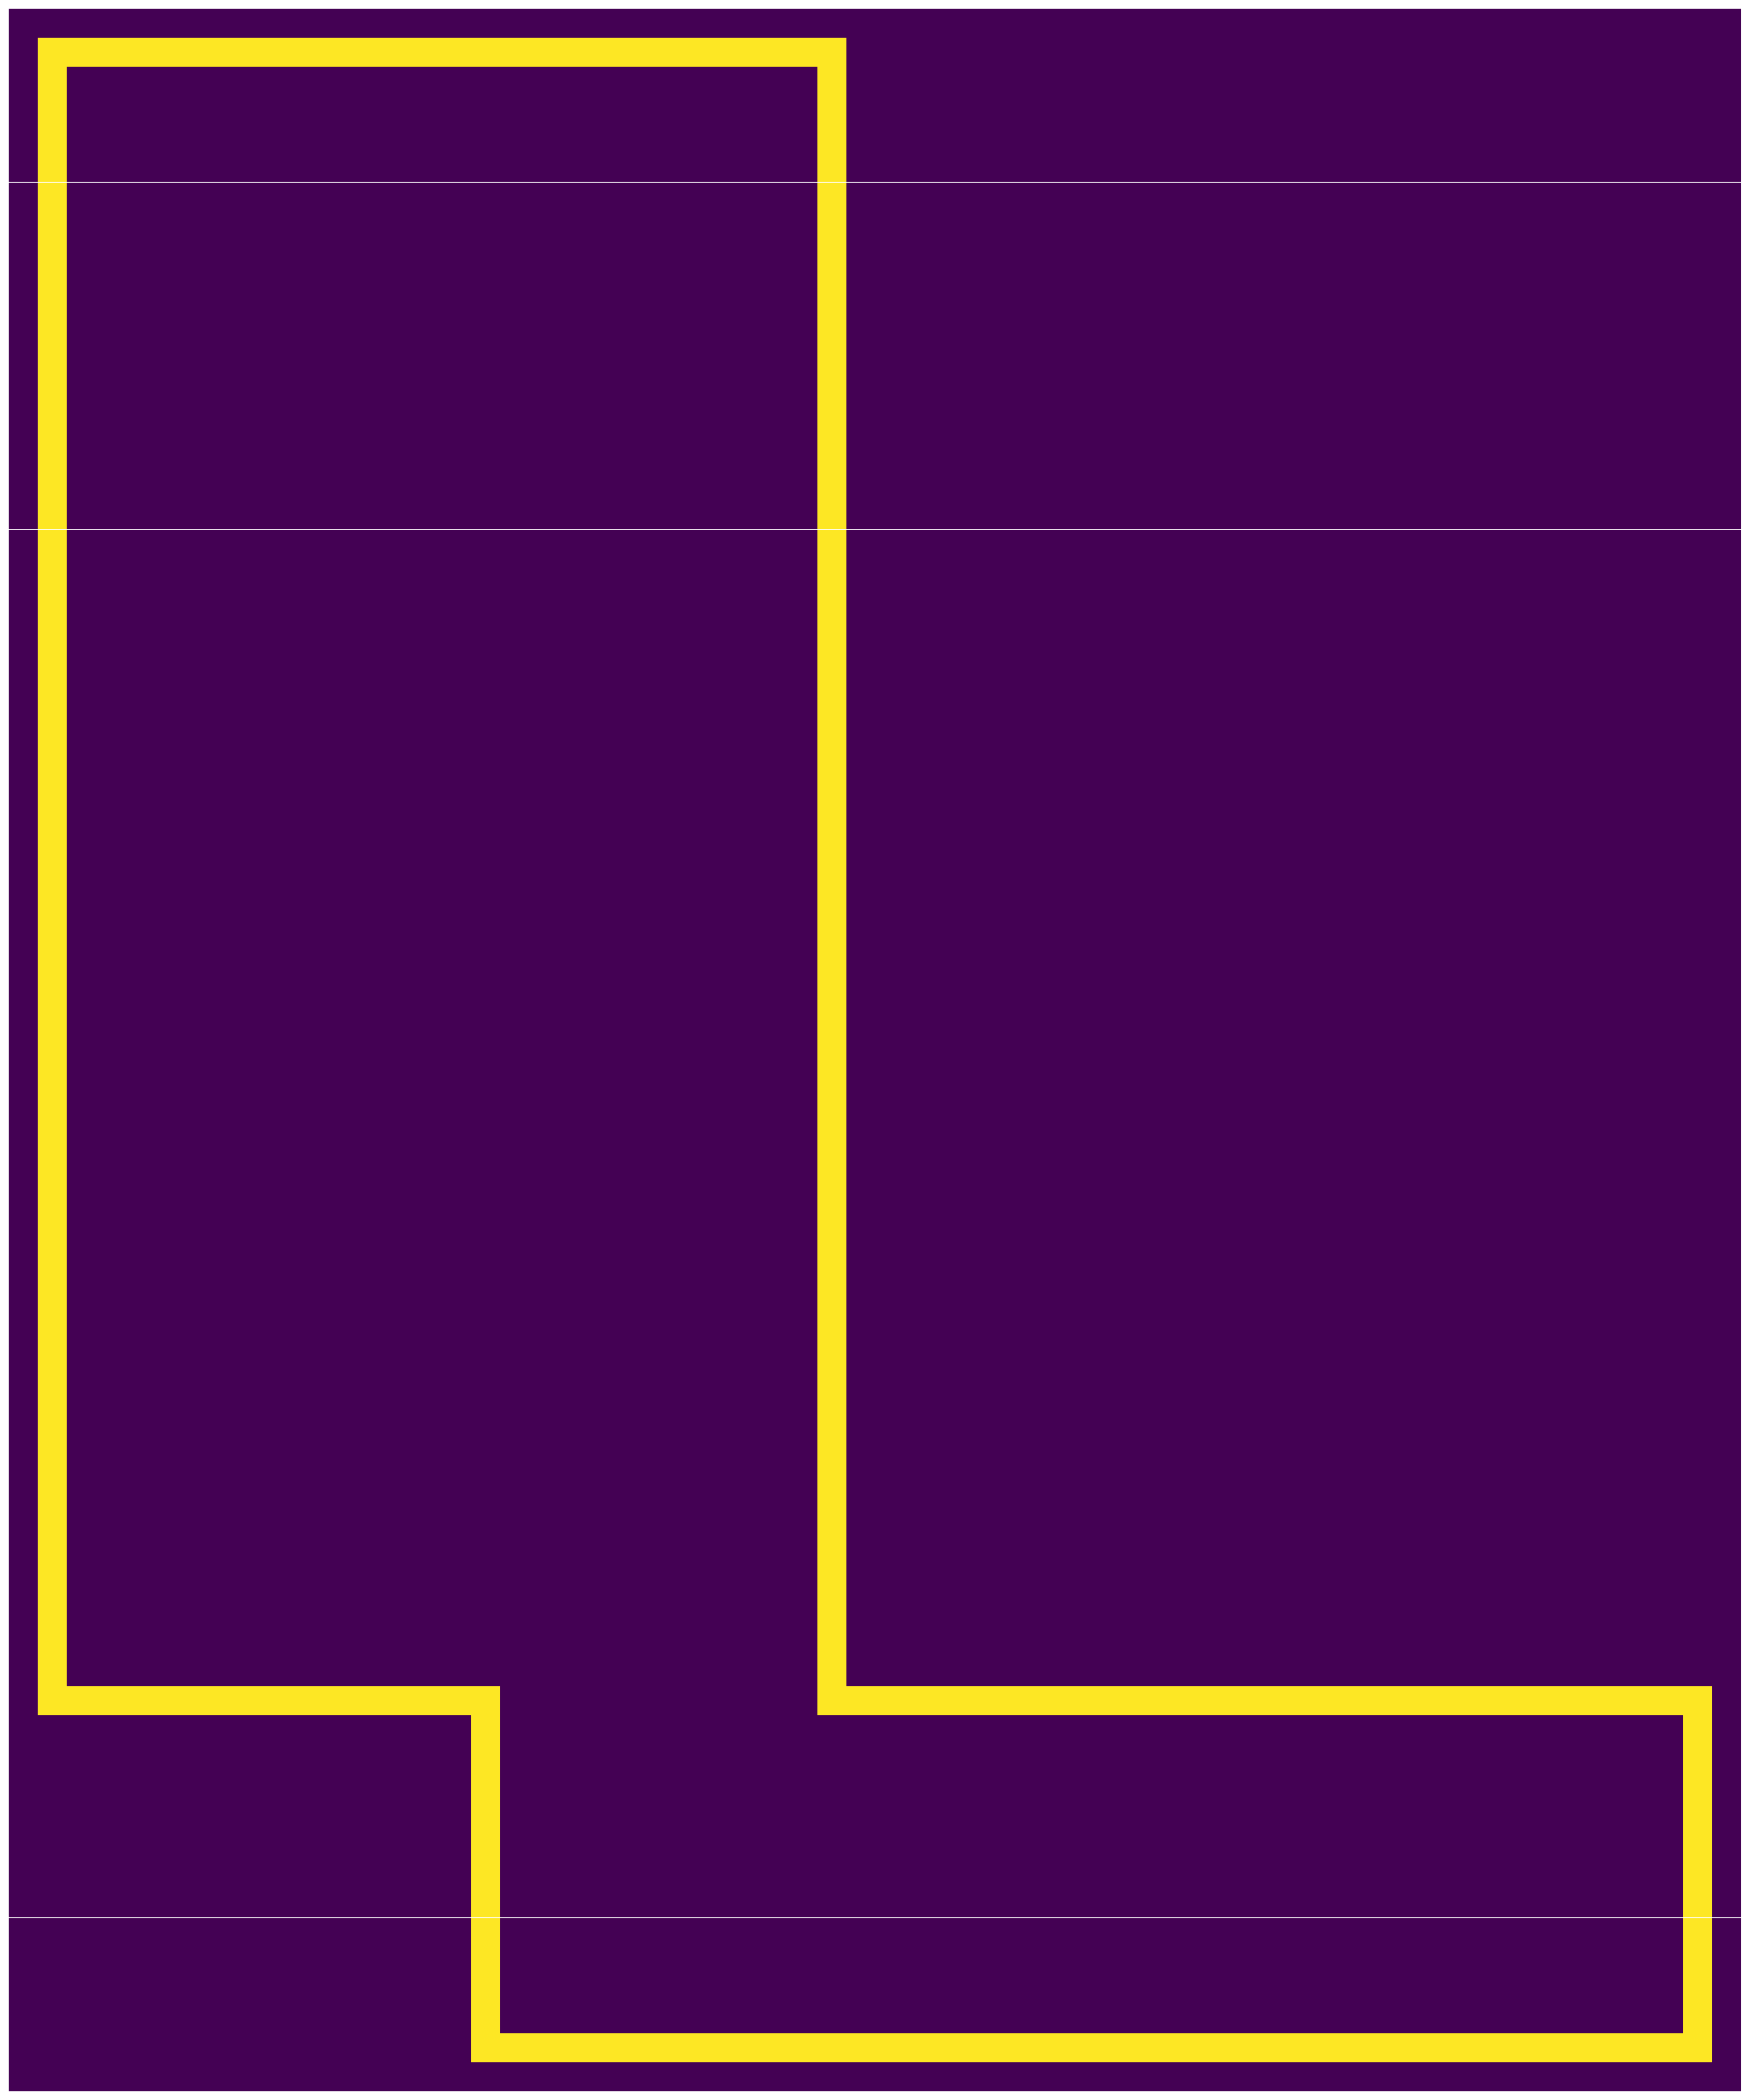

[[ 6 10 10 10 10 10 10 10 10 12  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0  0  0]
 [ 5 17 17 17 17 17 17 17 17  5  0  0  0  0  0  0  0  0

In [13]:
rect_a_int = gen_rect_int((10, 20))
rect_b_int = gen_rect_int((15, 5))

combined_int = glue_rect_int(rect_a_int, rect_b_int, offset=5)
combined_conv = int_to_wall(combined_int)

plot_rect((combined_conv.shape[1], combined_conv.shape[0]),combined_conv)
print(combined_int)


In [14]:
seeds = place_room_seeds(rect_a_int, total=0)
print(seeds)


[(0, 0), (0, 9), (19, 0), (19, 9)]


In [15]:
print(rect_a_int)

[[ 6 10 10 10 10 10 10 10 10 12]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 3 10 10 10 10 10 10 10 10  9]]


grown
seeds
grown
seeds
grown
seeds
grown
seeds


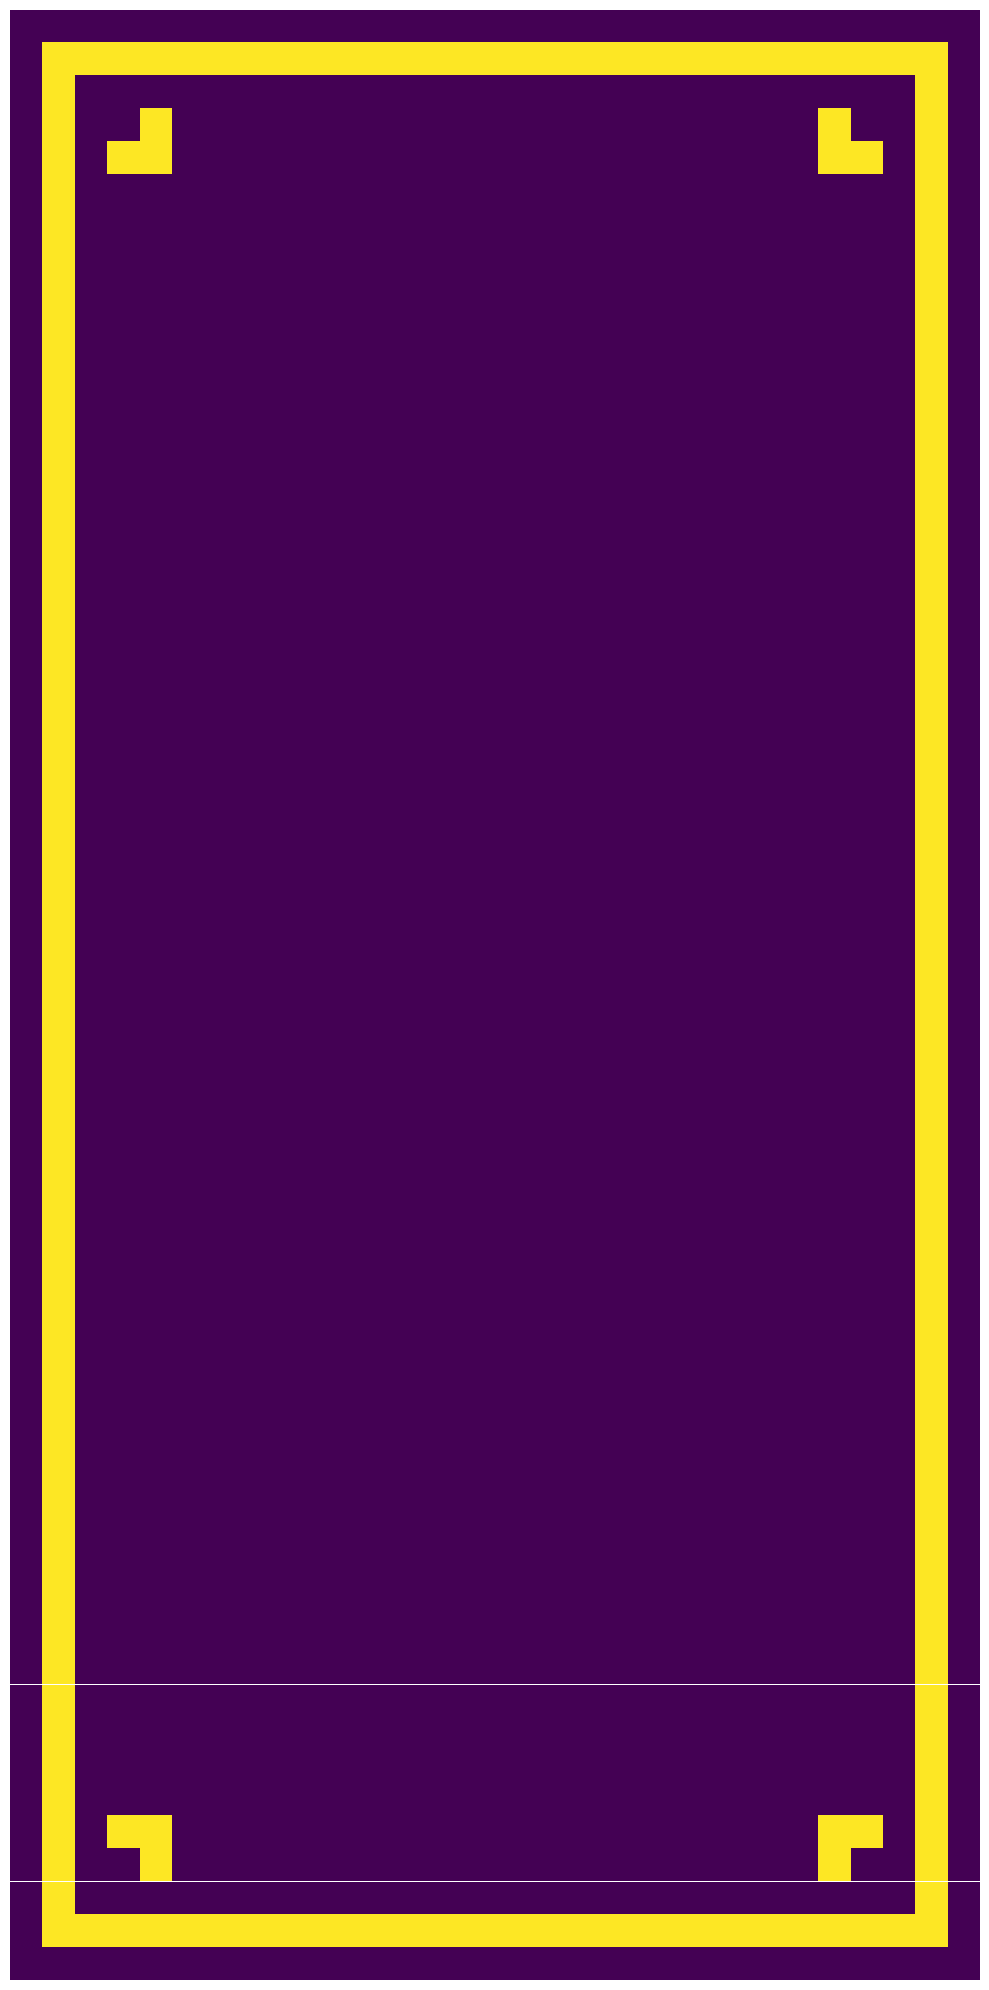

[[ 6 10 10 10 10 10 10 10 10 12]
 [ 5  9 17 17 17 17 17 17  3  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 17 17 17 17 17 17 17 17  5]
 [ 5 12 17 17 17 17 17 17  6  5]
 [ 3 10 10 10 10 10 10 10 10  9]]


In [16]:
for _ in range(10):  # Grow for 10 steps
    floor, seeds = grow_room_seeds(rect_a_int, seeds)
    if not seeds:
        break  # Stop if no more seeds to grow

grown_plott = int_to_wall(floor)
plot_rect((grown_plott.shape[1], grown_plott.shape[0]),grown_plott)
print(floor)
